In [42]:
### 3.2 线性回归的从零开始实现

In [43]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

#### 3.2.1 生成数据集

设训练数据集样本数为1000，输入个数（特征数）为2。给定随机生成的批量样本特征 X∈R1000×2，我们使用线性回归模型真实权重 w=[2,−3,4]⊤和偏差 b=4.2，以及一个随机噪声项 ϵ 来生成标签

y=Xw+b+ϵ

其中噪声项 ϵ 服从均值为0、标准差为0.01的正态分布。噪声代表了数据集中无意义的干扰。

In [44]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3, 4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.1, size=labels.size()),
                       dtype=torch.float32)

In [45]:
print(features[0], labels[0])

tensor([0.2558, 2.5803]) tensor(-2.8577)


C:\Users\njuxu\AppData\Local\Temp\ipykernel_9532\1763458900.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


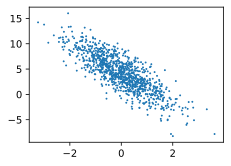

In [46]:
def use_svg_display():
    # 矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

#### 3.2.2 读取数据

In [47]:
# 每次返回 batch_size（批量大小）个随机样本的特征和标签
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [48]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.2296, -0.8411],
        [ 1.4344,  0.8881],
        [-0.1030,  0.6248],
        [-1.1818, -0.4333],
        [-0.7738,  0.6829],
        [-0.0315,  1.3988],
        [ 0.0504, -0.7625],
        [-1.0677,  1.2123],
        [-0.4104, -1.3644],
        [-1.1357,  0.6972]]) tensor([ 7.1015,  4.3560,  1.9939,  3.1183,  0.6165, -0.1681,  6.6216, -1.6375,
         7.5225, -0.1211])


#### 3.2.3 初始化模型参数

In [49]:
w = torch.tensor(np.random.normal(0, 0.1, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

#### 3.2.4 定义模型

In [50]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

#### 3.2.5 定义损失函数

In [51]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

#### 3.2.6 定义优化算法

In [52]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

#### 3.2.7 训练模型

In [53]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)

        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.039925
epoch 2, loss 0.005162
epoch 3, loss 0.005015


In [54]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3, 4] 
 tensor([[ 2.0047],
        [-3.0057]], requires_grad=True)
4.2 
 tensor([4.1973], requires_grad=True)
